## ML 모델링 프로세스
1. 데이터 수집
2. 전처리(클렌징)
3. 탐색 EDA - 타겟: 카테고리이면 분류, 숫자이면 회귀
4. 모델 선택
5. 모델 학습
6. 모델 평가
7. 모델 개선: 3번으로 돌아간다.또는 4번 또는 5번
8. 모델 배포 : AI서버에 올린다. 앱 개발. 


## 데이터 수집


In [51]:
from sklearn.datasets import load_iris
iris=load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [52]:
iris_data=iris.data
iris_data.shape  #X

(150, 4)

In [53]:
iris_label=iris.target  #y=0,1,2
iris_label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

X는 iris_data, y는 iris_label, y는 카테고리이자 타겟, 알고싶은 정답. 도달하고자 하는 정답

## 데이터 분할
- 훈련용+테스트용: 8:2 또는 7:3으로 랜덤하게 쪼갠다

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(iris_data,
                                                  iris_label,
                                                  test_size=0.2,
                                                  random_state=42)
X_train.shape, X_test.shape #X의 훈련용, 테스트용 분할결과

((120, 4), (30, 4))

In [55]:
X_train[:5]

array([[4.6, 3.6, 1. , 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [6.7, 3.1, 4.4, 1.4],
       [4.8, 3.4, 1.6, 0.2],
       [4.4, 3.2, 1.3, 0.2]])

In [56]:
y_train.shape, y_test.shape

((120,), (30,))

## 모델 선택> DecisionTreeClassifier

In [57]:
from sklearn.tree import DecisionTreeClassifier #알고리즘을 구현해놓은 class
iris_Dt_clf=DecisionTreeClassifier() #객체 생성
iris_Dt_clf

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",None
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the curre

## 모델학습
X,y를 넣어준다. 단, train을 넣어준다. 

In [58]:
iris_Dt_clf.fit(X_train, y_train)
iris_Dt_clf

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",None
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the curre

## 모델 평가

In [59]:
iris_pred=iris_Dt_clf.predict(X_test)
iris_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [60]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, iris_pred)

1.0

## 혼동행렬

In [61]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, iris_pred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

c:\Users\Admin\miniconda3\envs\ml_edu\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Admin\miniconda3\envs\ml_edu\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Admin\miniconda3\envs\ml_edu\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44050 (\N{HANGUL SYLLABLE GABS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Admin\miniconda3\envs\ml_edu\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Admin\miniconda3\envs\ml_edu\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) m

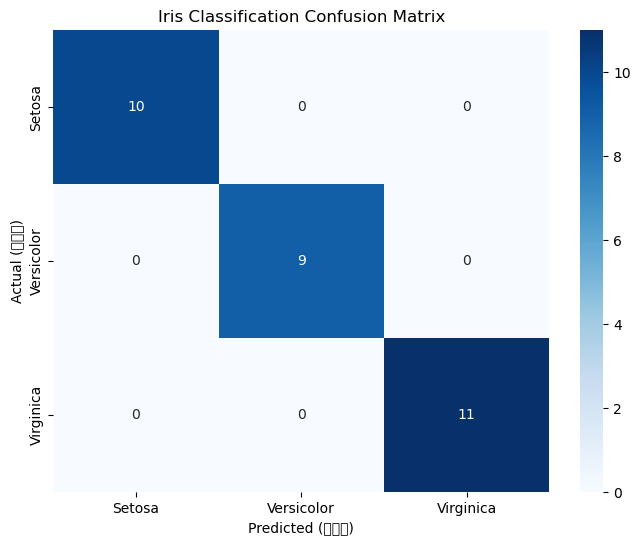

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# 1. 오차 행렬 계산
cm = confusion_matrix(y_test, iris_pred)

# 2. 클래스 이름 정의 (Iris 데이터셋 기준)
class_names = ['Setosa', 'Versicolor', 'Virginica']

# 3. 히트맵 그리기
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, 
            yticklabels=class_names)

plt.xlabel('Predicted (예측값)')
plt.ylabel('Actual (실제값)')
plt.title('Iris Classification Confusion Matrix')
plt.show()

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Accuracy: 1.0


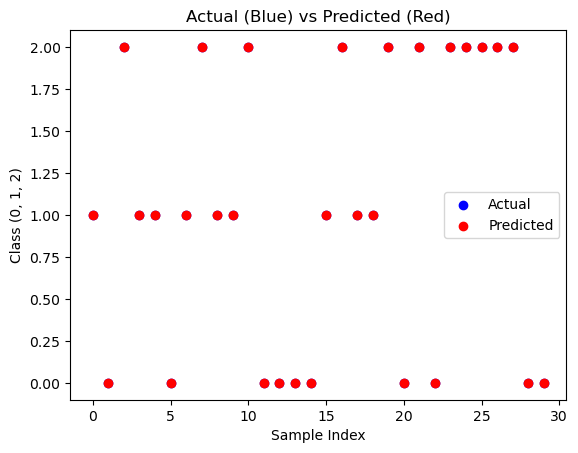

In [63]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

# 1. 데이터 불러오기
iris = load_iris()
X = iris.data
y = iris.target

# 2. 학습/테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3. 결정트리 모델 생성 및 학습
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# 4. 예측
iris_pred = model.predict(X_test)

# 5. 혼동행렬 및 정확도 출력
print("Confusion Matrix:")
print(confusion_matrix(y_test, iris_pred))

print("\nAccuracy:", accuracy_score(y_test, iris_pred))

# 6. 실제값 vs 예측값 산점도
plt.figure()

# 실제값 (파란색)
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual')

# 예측값 (빨간색)
plt.scatter(range(len(iris_pred)), iris_pred, color='red', label='Predicted')

plt.xlabel("Sample Index")
plt.ylabel("Class (0, 1, 2)")
plt.title("Actual (Blue) vs Predicted (Red)")
plt.legend()

plt.show()

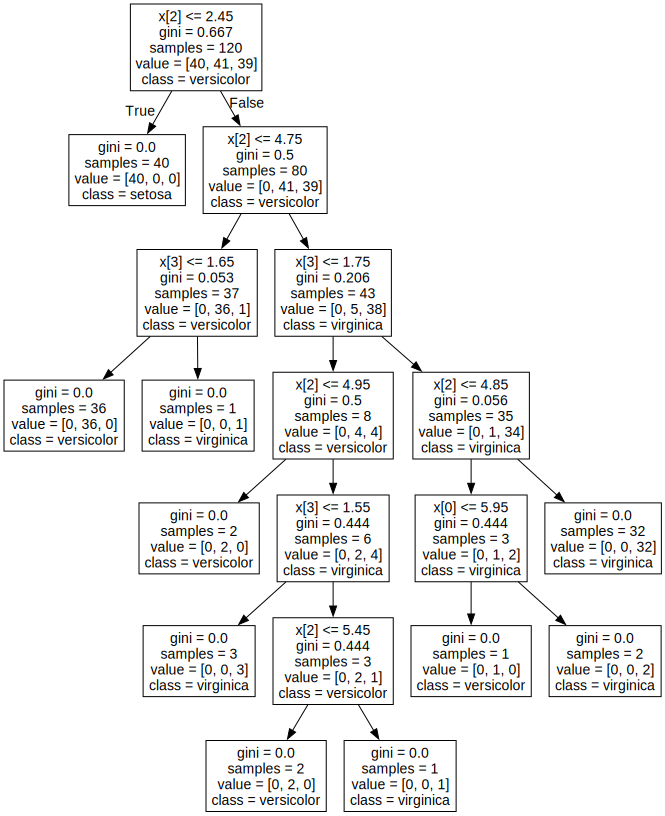

In [64]:
import graphviz
from sklearn.tree import export_graphviz
#모델의 트리를 파일로 저장
export_graphviz(iris_Dt_clf, out_file='iris_tree.dot',
               class_names=iris.target_names)
#tree파일을 읽어옴
with open('iris_tree.dot') as f:
  dot_graph=f.read()
  
graphviz.Source(dot_graph)


## k-fold cross validation 교차검증

In [65]:
import pandas as pd

In [66]:
iris_data_df=pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_data_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [67]:
iris_data_df['label']=iris.target
iris_data_df['label'].value_counts()

label
0    50
1    50
2    50
Name: count, dtype: int64

In [68]:
from sklearn.model_selection import KFold
kfold_5=KFold(n_splits=5)
kfold_5

KFold(n_splits=5, random_state=None, shuffle=False)

In [69]:
iris_cv_clf=DecisionTreeClassifier(random_state=42)
iris_cv_clf

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",42
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current

In [70]:
for train_index, test_index in kfold_5.split(iris_data):
  X_train, X_test = iris_data[train_index], iris_data[test_index]
  y_train, y_test = iris_label[train_index], iris_label[test_index]
  
  iris_cv_clf.fit(X_train, y_train)
  pred=iris_cv_clf.predict(X_test)
  acc=accuracy_score(y_test, pred)
  print(f'Accuracy: {acc:.4f}')
  

Accuracy: 1.0000
Accuracy: 1.0000
Accuracy: 0.8333
Accuracy: 0.9333
Accuracy: 0.8000


In [71]:
from sklearn.model_selection import cross_val_score
X=iris.data
y=iris.target
iris_Dt_clf_cv=DecisionTreeClassifier(random_state=156)
cross_val_score(iris_Dt_clf_cv, X, y, cv=5, scoring='accuracy')

array([0.96666667, 0.96666667, 0.9       , 0.96666667, 1.        ])

In [72]:
from sklearn.model_selection import StratifiedKFold
skf=StratifiedKFold(n_splits=5)
cross_val_score(iris_Dt_clf_cv, X, y, cv=skf, scoring='accuracy')

array([0.96666667, 0.96666667, 0.9       , 0.96666667, 1.        ])

## GridSearchCV

In [73]:
from sklearn.model_selection import GridSearchCV
iris_Dt_gcv=DecisionTreeClassifier(random_state=121)
params={'max_depth':[1,2,3], 'min_samples_split':[2,3]}
grid_dt_cv=GridSearchCV(iris_Dt_gcv, cv=5, param_grid=params)
grid_dt_cv.fit(X,y)


,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",DecisionTreeC...dom_state=121)
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'max_depth': [1, 2, ...], 'min_samples_split': [2, 3]}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",None
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",None
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",5
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold and parameter candidate is displayed;- >2 : the score is also displayed;- >3 : 

## 두번째 모델 연습

In [74]:
from sklearn.datasets import load_wine
wine=load_wine()
wine.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [75]:
wine_data=wine.data
wine_data.shape


(178, 13)

In [76]:
wine_label=wine.target
wine_label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [77]:
from sklearn.model_selection import train_test_split

In [78]:
X_train, X_test, y_train, y_test=train_test_split(
  wine_data, wine_label, test_size=0.2, random_state=38
  
)

In [79]:
X_train.shape, X_test.shape

((142, 13), (36, 13))

In [80]:
y_train.shape, y_test.shape

((142,), (36,))

In [81]:
from sklearn.tree import DecisionTreeClassifier

In [82]:
wine_Dt_clf=DecisionTreeClassifier(random_state=38)

In [83]:
wine_Dt_clf.fit(X_train, y_train)

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",38
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current

In [84]:
wine_pred=wine_Dt_clf.predict(X_test)

In [85]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, wine_pred)

0.9444444444444444

C:\Users\Admin\AppData\Local\Temp\ipykernel_3884\2462995052.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=labels, y=scores, palette='viridis')


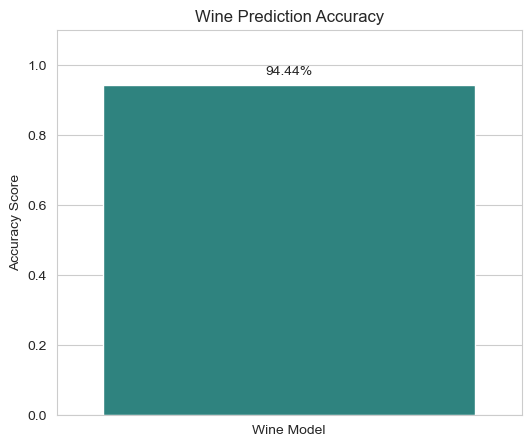

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 정확도 계산 (예시 값을 변수에 저장)
acc = accuracy_score(y_test, wine_pred)

# 2. 시각화를 위한 데이터 설정
labels = ['Wine Model']
scores = [acc]

# 3. 막대 그래프 그리기
plt.figure(figsize=(6, 5))
sns.set_style("whitegrid") # 배경에 깔끔한 격자 추가

ax = sns.barplot(x=labels, y=scores, palette='viridis')

# 그래프 위에 숫자(백분율) 표시하기
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2%}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 9), 
                textcoords='offset points')

plt.ylim(0, 1.1) # y축 범위를 0~110%로 설정 (여유 공간)
plt.ylabel('Accuracy Score')
plt.title('Wine Prediction Accuracy')
plt.show()

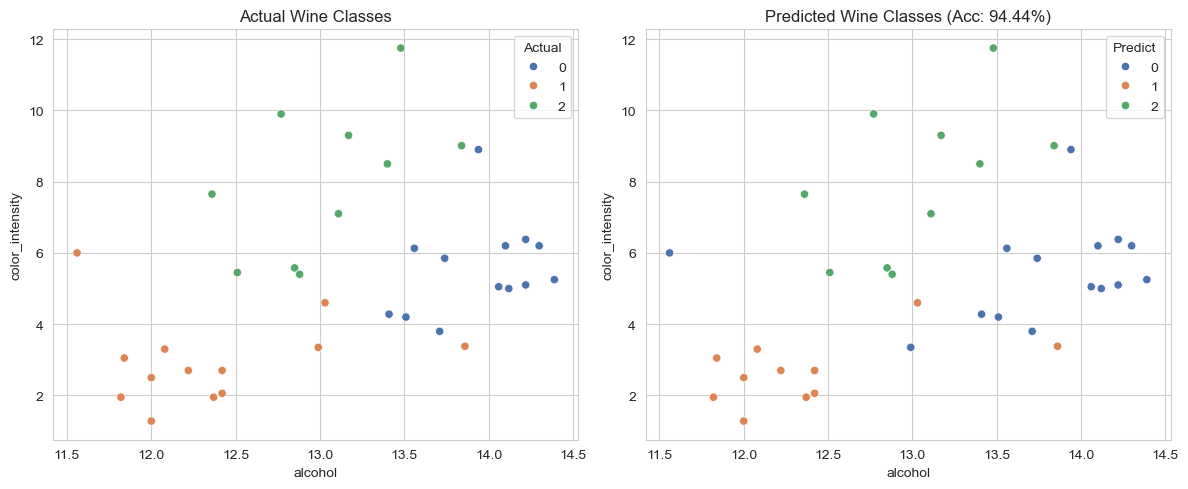

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. 시각화를 위한 데이터프레임 생성 (테스트 데이터 기준)
# X_test의 컬럼명이 'alcohol', 'color_intensity'라고 가정합니다.
plot_df = pd.DataFrame(X_test, columns=wine.feature_names)
plot_df['Actual'] = y_test
plot_df['Predict'] = wine_pred

# 2. 산점도 그리기 (실제값 vs 예측값 비교)
plt.figure(figsize=(12, 5))

# [왼쪽] 실제 정답 분포
plt.subplot(1, 2, 1)
sns.scatterplot(data=plot_df, x='alcohol', y='color_intensity', hue='Actual', palette='deep')
plt.title('Actual Wine Classes')

# [오른쪽] 모델이 예측한 분포
plt.subplot(1, 2, 2)
sns.scatterplot(data=plot_df, x='alcohol', y='color_intensity', hue='Predict', palette='deep')
plt.title(f'Predicted Wine Classes (Acc: {accuracy_score(y_test, wine_pred):.2%})')

plt.tight_layout()
plt.show()

## 의사결정나무 알고리즘

In [88]:
import graphviz
from sklearn.tree import export_graphviz

export_graphviz(wine_Dt_clf, out_file='wine')

## wine data로 데이터스케일링

In [89]:
import pandas as pd                      # 1. 'pd'라는 이름으로 판다스 도구를 가져와요
from sklearn.datasets import load_wine

In [90]:
wine=load_wine()
wine_df=pd.DataFrame(data=wine.data, columns=wine.feature_names)
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [91]:
wine_df['target']=wine.target
wine_df['target'].value_counts().sort_index()

target
0    59
1    71
2    48
Name: count, dtype: int64

## LogisticRegression

In [92]:
X=wine.data
y=wine.target

In [93]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=11)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((142, 13), (36, 13), (142,), (36,))

In [94]:
from sklearn.linear_model import LogisticRegression
wine_lr_clf=LogisticRegression(max_iter=36)
wine_lr_clf.fit(X_train, y_train)
wine_lr_pred=wine_lr_clf.predict(X_test)
accuracy_score(y_test, wine_lr_pred)

c:\Users\Admin\miniconda3\envs\ml_edu\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 36 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=36).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9722222222222222

## 스케일링

In [95]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [96]:
X_train_scaled

array([[ 1.07209411, -0.87739415, -0.34020117, ...,  0.23768647,
         1.36785277,  0.99198161],
       [ 0.69436514, -0.54344347,  0.35044048, ...,  0.11086478,
         0.63542167,  1.23591152],
       [ 0.97136638,  0.36173865, -0.23115249, ..., -1.07280431,
        -1.26608215, -0.40654984],
       ...,
       [-1.26982547, -0.73678334,  0.20504224, ...,  0.40678205,
         0.10018356, -0.94319563],
       [-1.26982547, -1.25528571, -1.32163931, ...,  1.80182062,
         0.76218859, -1.50260821],
       [ 0.27886328,  0.83630015, -0.30385161, ..., -1.66463885,
        -1.50553078, -0.21140592]], shape=(142, 13))

In [97]:
from sklearn.linear_model import LogisticRegression
wine_lr_clf_scaled=LogisticRegression(max_iter=36)
wine_lr_clf_scaled.fit(X_train_scaled, y_train)
wine_lr_pred_scaled=wine_lr_clf_scaled.predict(X_test_scaled)
accuracy_score(y_test, wine_lr_pred_scaled)

1.0

In [98]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [99]:
models={
  'KNN':KNeighborsClassifier(),
  'RF' : RandomForestClassifier(),
  'LR' : LogisticRegression()  
}

for name, model in models.items():
  model.fit(X_train_scaled, y_train)
  y_pred=model.predict(X_test_scaled)
  print(f'{name} 모델의 정확도: {accuracy_score(y_test, y_pred):.5f}')

KNN 모델의 정확도: 1.00000
RF 모델의 정확도: 0.97222
LR 모델의 정확도: 1.00000


In [100]:
models={
  'KNN':KNeighborsClassifier(n_neighbors=10),
  'RF' : RandomForestClassifier(n_estimators=60),
  'LR' : LogisticRegression(C=20)  
}

for name, model in models.items():
  model.fit(X_train_scaled, y_train)
  y_pred=model.predict(X_test_scaled)
  print(f'{name} 모델의 정확도: {accuracy_score(y_test, y_pred):.5f}')

KNN 모델의 정확도: 1.00000
RF 모델의 정확도: 1.00000
LR 모델의 정확도: 1.00000


## 모델별 하이퍼 파라미터 실험
- 파이썬에서 파라미터는 함수에서 입력값을 넣기 위해 지정한 변수 이름, 그안에 값을 넣으면 argument
- def add(a, b): a,b는 파라미터, 그안에 실제 넣는 값, 3,5 는 argument
- 머신러닝에서의 파라미터 의미는 모델이 학습을 통해 스스로 배우는 값, 사람이 정하지 않는다.
- 머신러닝에서 하이퍼 파라미터는 학습전에 사람이 정한다.
model = LogisticRegression(C=1)  C는 하이퍼 파라미터
model.fit(X_train, y_train)

In [101]:
print("\n===== KNN 하이퍼파라미터 실험 =====")

for k in [1, 3, 5, 7, 10, 15, 21]:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train_scaled, y_train)
    acc = model.score(X_test_scaled, y_test)
    print(f'n_neighbors={k} → 정확도: {acc:.5f}')


===== KNN 하이퍼파라미터 실험 =====
n_neighbors=1 → 정확도: 1.00000
n_neighbors=3 → 정확도: 1.00000
n_neighbors=5 → 정확도: 1.00000
n_neighbors=7 → 정확도: 1.00000
n_neighbors=10 → 정확도: 1.00000
n_neighbors=15 → 정확도: 1.00000
n_neighbors=21 → 정확도: 1.00000


In [102]:
print("\n===== RandomForest 하이퍼파라미터 실험 =====")

for n in [50, 100, 200, 300]:
    model = RandomForestClassifier(n_estimators=n, random_state=42)
    model.fit(X_train_scaled, y_train)
    acc = model.score(X_test_scaled, y_test)
    print(f'n_estimators={n} → 정확도: {acc:.5f}')



===== RandomForest 하이퍼파라미터 실험 =====
n_estimators=50 → 정확도: 0.97222
n_estimators=100 → 정확도: 0.97222
n_estimators=200 → 정확도: 0.97222
n_estimators=300 → 정확도: 0.97222


In [103]:
print("\n===== LogisticRegression 하이퍼파라미터 실험 =====")

for c in [0.001, 0.01, 0.1, 1, 10, 50, 100]:
    model = LogisticRegression(C=c, max_iter=1000)
    model.fit(X_train_scaled, y_train)
    acc = model.score(X_test_scaled, y_test)
    print(f'C={c} → 정확도: {acc:.5f}')


===== LogisticRegression 하이퍼파라미터 실험 =====
C=0.001 → 정확도: 0.91667
C=0.01 → 정확도: 1.00000
C=0.1 → 정확도: 1.00000
C=1 → 정확도: 1.00000
C=10 → 정확도: 1.00000
C=50 → 정확도: 1.00000
C=100 → 정확도: 1.00000
